### Business Understanding

Machine learning has found application in various sectors of human endeavors of which marketing is not an exemption. Marketing is a key part of any business. It requires strategic steps in order to maximize its impact in today’s dynamic world using every available medium. In this work, we applied Logistic regression – a classification algorithm in machine learning to achieve this goal. Our goal is to achieve high true positive (TP) and reduce false negative or type 2 error. In other words, we want to have high tolerance on false positive or type 1 error. Our algorithm gave an accuracy of 70%.

### Data Preparation

In [1]:
#### Data loading
mall_data <- read.csv("Mall_Customers.csv")
head(mall_data)

CustomerID,Gender,Age,Annual_Income,Spending_Score
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [2]:
attach(mall_data)

### EDA

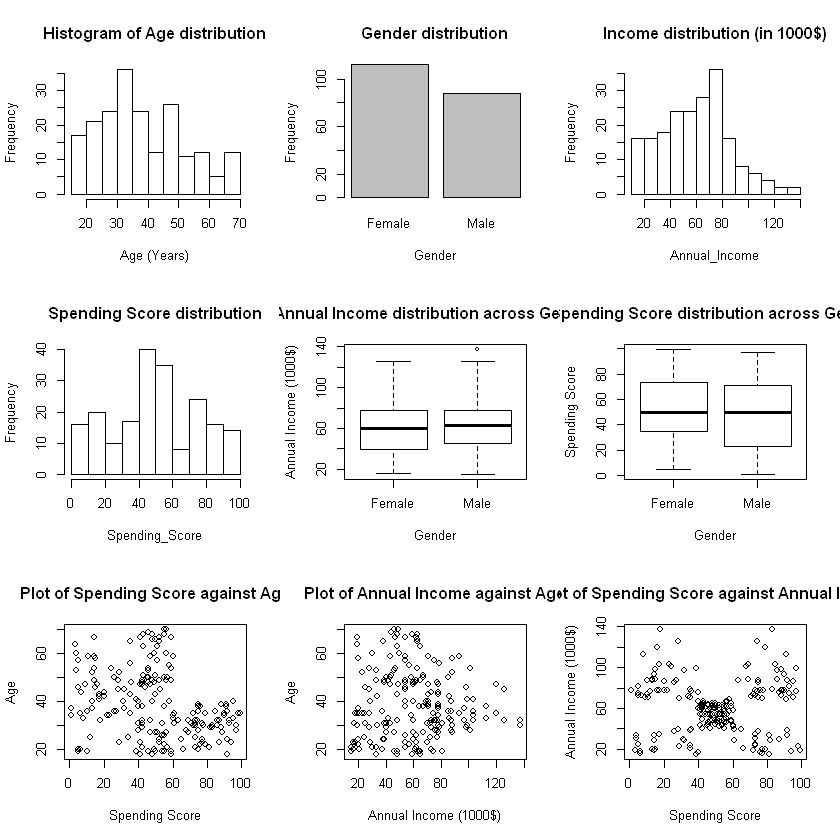

In [3]:
#### Plots
par(mfrow=c(3,3))
hist(Age, xlab="Age (Years)", ylab="Frequency", main = "Histogram of Age distribution")
plot(Gender, xlab="Gender", ylab="Frequency", main = "Gender distribution")
hist(Annual_Income, main = "Income distribution (in 1000$)")
hist(Spending_Score, main = "Spending Score distribution")
plot(Gender, Annual_Income, xlab="Gender", ylab="Annual Income (1000$)", main = "Annual Income distribution across Gender")
plot(Gender, Spending_Score, xlab="Gender", ylab="Spending Score", main = "Spending Score distribution across Gender")
plot(Spending_Score, Age, xlab="Spending Score", ylab="Age", main = "Plot of Spending Score against Age")
plot(Annual_Income, Age, xlab="Annual Income (1000$)", ylab="Age", main = "Plot of Annual Income against Age")
plot(Spending_Score, Annual_Income, xlab="Spending Score", ylab="Annual Income (1000$)", 
     main = "Plot of Spending Score against Annual Income")

Most of the customers age ranges from teen to 50 years and are females.

The income distribution chart shows that most of the customers earn between 15,000 and 80,000 USD annually.

Spending score range of 40 to 60 are prominent in the data as show in Spending score distribution above.

Males seem to generally earn more than females also with higher median annual income. Both genders have same highest and lowest annual earning. There is an outlier in the male income distribution of about $140,000 annual income. This is not out of place and we choose to keep it for modelling.

It is not surprising that females generally spend more than their male counterparts though they appear to have same median spending score.

There is no correlation between these Age and Spending score. Though there seems to be a sign of clusters. Similarly, there is no correlation between aga and annual income.

We could see five different clusters in the scatter plot of Annual income versus Spending score. This gives an insight that there are possibly five different types of shoppers in our data. Had it been we want to perform an unsupervised learning, We could have given names to the different clusters shown above but we are interested in separating the shoppers into two classes; high-spending and low-spending customers.

In [4]:
# Statistical Summary of data based on Gender
summary(mall_data)

   CustomerID        Gender         Age        Annual_Income    Spending_Score 
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00   Min.   : 1.00  
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50   1st Qu.:34.75  
 Median :100.50                Median :36.00   Median : 61.50   Median :50.00  
 Mean   :100.50                Mean   :38.85   Mean   : 60.56   Mean   :50.20  
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00   3rd Qu.:73.00  
 Max.   :200.00                Max.   :70.00   Max.   :137.00   Max.   :99.00  

Our data set contains spending information for 112 females and 88 males as shown above. This distribution is not biased. The five number summaries of other predictors are also okay. They are all important consideration in moving forward with our choice of data and EDA.

In [5]:
by(mall_data, mall_data$Gender, summary)

mall_data$Gender: Female
   CustomerID        Gender         Age       Annual_Income    Spending_Score 
 Min.   :  3.00   Female:112   Min.   :18.0   Min.   : 16.00   Min.   : 5.00  
 1st Qu.: 46.75   Male  :  0   1st Qu.:29.0   1st Qu.: 39.75   1st Qu.:35.00  
 Median : 94.50                Median :35.0   Median : 60.00   Median :50.00  
 Mean   : 97.56                Mean   :38.1   Mean   : 59.25   Mean   :51.53  
 3rd Qu.:148.25                3rd Qu.:47.5   3rd Qu.: 77.25   3rd Qu.:73.00  
 Max.   :197.00                Max.   :68.0   Max.   :126.00   Max.   :99.00  
------------------------------------------------------------ 
mall_data$Gender: Male
   CustomerID       Gender        Age        Annual_Income    Spending_Score 
 Min.   :  1.0   Female: 0   Min.   :18.00   Min.   : 15.00   Min.   : 1.00  
 1st Qu.: 59.5   Male  :88   1st Qu.:27.75   1st Qu.: 45.50   1st Qu.:24.50  
 Median :106.5               Median :37.00   Median : 62.50   Median :50.00  
 Mean   :104.2           

The summary above shows the statistics by gender without high shortcomings in age and annual income distribution.

In [6]:
# Categorical feature transformation
mall_data$Spending_Score <- ifelse(mall_data$Spending_Score >= 50, 'High', 'Low')
head(mall_data)

CustomerID,Gender,Age,Annual_Income,Spending_Score
1,Male,19,15,Low
2,Male,21,15,High
3,Female,20,16,Low
4,Female,23,16,High
5,Female,31,17,Low
6,Female,22,17,High


In [7]:
# Summary based on Spending_score
by(mall_data, mall_data$Spending_Score, summary)

mall_data$Spending_Score: High
   CustomerID        Gender        Age        Annual_Income   
 Min.   :  2.00   Female:58   Min.   :18.00   Min.   : 15.00  
 1st Qu.: 52.25   Male  :44   1st Qu.:26.25   1st Qu.: 42.25  
 Median : 97.00               Median :31.50   Median : 60.00  
 Mean   : 99.75               Mean   :34.92   Mean   : 60.20  
 3rd Qu.:149.50               3rd Qu.:38.75   3rd Qu.: 77.75  
 Max.   :200.00               Max.   :70.00   Max.   :137.00  
 Spending_Score    
 Length:102        
 Class :character  
 Mode  :character  
                   
                   
                   
------------------------------------------------------------ 
mall_data$Spending_Score: Low
   CustomerID        Gender        Age        Annual_Income   
 Min.   :  1.00   Female:54   Min.   :18.00   Min.   : 15.00  
 1st Qu.: 49.25   Male  :44   1st Qu.:34.00   1st Qu.: 40.00  
 Median :101.50               Median :44.50   Median : 62.00  
 Mean   :101.29               Mean   :42.94 

The results above shows income distribution between the two genders. There are 102 low-income earners and 98 high-income earners with both having a good proportion of both genders.

In [8]:
# Label encoding
mall_data$Gender <- ifelse(mall_data$Gender == 'Male', 1, 0)
mall_data$Spending_Score <- ifelse(mall_data$Spending_Score == 'High', 1, 0)
head(mall_data)

CustomerID,Gender,Age,Annual_Income,Spending_Score
1,1,19,15,0
2,1,21,15,1
3,0,20,16,0
4,0,23,16,1
5,0,31,17,0
6,0,22,17,1


#### Modelling

In [9]:
# Training data
train <- mall_data[1:140,]
head(train)
tail(train)
by(train, train$Spending_Score, summary)
by(train, train$Gender, summary)

CustomerID,Gender,Age,Annual_Income,Spending_Score
1,1,19,15,0
2,1,21,15,1
3,0,20,16,0
4,0,23,16,1
5,0,31,17,0
6,0,22,17,1


,CustomerID,Gender,Age,Annual_Income,Spending_Score
135,135,1,20,73,0
136,136,0,29,73,1
137,137,0,44,73,0
138,138,1,32,73,1
139,139,1,19,74,0
140,140,0,35,74,1


train$Spending_Score: 0
   CustomerID         Gender            Age        Annual_Income  
 Min.   :  1.00   Min.   :0.0000   Min.   :18.00   Min.   :15.00  
 1st Qu.: 34.50   1st Qu.:0.0000   1st Qu.:32.00   1st Qu.:33.00  
 Median : 74.00   Median :0.0000   Median :46.50   Median :52.00  
 Mean   : 70.97   Mean   :0.4265   Mean   :43.43   Mean   :47.66  
 3rd Qu.:106.50   3rd Qu.:1.0000   3rd Qu.:53.00   3rd Qu.:62.25  
 Max.   :139.00   Max.   :1.0000   Max.   :69.00   Max.   :74.00  
 Spending_Score
 Min.   :0     
 1st Qu.:0     
 Median :0     
 Mean   :0     
 3rd Qu.:0     
 Max.   :0     
------------------------------------------------------------ 
train$Spending_Score: 1
   CustomerID         Gender            Age        Annual_Income  
 Min.   :  2.00   Min.   :0.0000   Min.   :18.00   Min.   :15.00  
 1st Qu.: 37.50   1st Qu.:0.0000   1st Qu.:23.00   1st Qu.:33.75  
 Median : 66.50   Median :0.0000   Median :31.00   Median :48.00  
 Mean   : 70.06   Mean   :0.4306   Mean  

train$Gender: 0
   CustomerID         Gender       Age       Annual_Income   Spending_Score  
 Min.   :  3.00   Min.   :0   Min.   :18.0   Min.   :16.00   Min.   :0.0000  
 1st Qu.: 36.75   1st Qu.:0   1st Qu.:26.5   1st Qu.:33.75   1st Qu.:0.0000  
 Median : 67.50   Median :0   Median :35.0   Median :48.00   Median :1.0000  
 Mean   : 68.28   Mean   :0   Mean   :38.3   Mean   :46.62   Mean   :0.5125  
 3rd Qu.:101.25   3rd Qu.:0   3rd Qu.:49.0   3rd Qu.:62.00   3rd Qu.:1.0000  
 Max.   :140.00   Max.   :0   Max.   :68.0   Max.   :74.00   Max.   :1.0000  
------------------------------------------------------------ 
train$Gender: 1
   CustomerID         Gender       Age        Annual_Income   Spending_Score  
 Min.   :  1.00   Min.   :1   Min.   :18.00   Min.   :15.00   Min.   :0.0000  
 1st Qu.: 33.75   1st Qu.:1   1st Qu.:24.75   1st Qu.:33.00   1st Qu.:0.0000  
 Median : 75.50   Median :1   Median :39.50   Median :54.00   Median :1.0000  
 Mean   : 73.47   Mean   :1   Mean   :41.50 

In [10]:
# Test data
test <- mall_data[141:200,]
head(test)
tail(test)
by(test, test$Spending_Score, summary)
by(test, test$Gender, summary)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
141,141,0,57,75,0
142,142,1,32,75,1
143,143,0,28,76,0
144,144,0,32,76,1
145,145,1,25,77,0
146,146,1,28,77,1


,CustomerID,Gender,Age,Annual_Income,Spending_Score
195,195,0,47,120,0
196,196,0,35,120,1
197,197,0,45,126,0
198,198,1,32,126,1
199,199,1,32,137,0
200,200,1,30,137,1


test$Spending_Score: 0
   CustomerID        Gender         Age        Annual_Income    Spending_Score
 Min.   :141.0   Min.   :0.0   Min.   :19.00   Min.   : 75.00   Min.   :0     
 1st Qu.:155.5   1st Qu.:0.0   1st Qu.:34.50   1st Qu.: 78.00   1st Qu.:0     
 Median :170.0   Median :0.5   Median :41.50   Median : 87.00   Median :0     
 Mean   :170.0   Mean   :0.5   Mean   :41.83   Mean   : 91.03   Mean   :0     
 3rd Qu.:184.5   3rd Qu.:1.0   3rd Qu.:47.75   3rd Qu.: 98.75   3rd Qu.:0     
 Max.   :199.0   Max.   :1.0   Max.   :59.00   Max.   :137.00   Max.   :0     
------------------------------------------------------------ 
test$Spending_Score: 1
   CustomerID        Gender            Age        Annual_Income   
 Min.   :142.0   Min.   :0.0000   Min.   :27.00   Min.   : 75.00  
 1st Qu.:156.5   1st Qu.:0.0000   1st Qu.:30.00   1st Qu.: 78.00  
 Median :171.0   Median :0.0000   Median :32.00   Median : 87.00  
 Mean   :171.0   Mean   :0.4333   Mean   :32.03   Mean   : 91.03  
 3rd

test$Gender: 0
   CustomerID        Gender       Age        Annual_Income    Spending_Score  
 Min.   :141.0   Min.   :0   Min.   :27.00   Min.   : 75.00   Min.   :0.0000  
 1st Qu.:155.8   1st Qu.:0   1st Qu.:31.75   1st Qu.: 78.00   1st Qu.:0.0000  
 Median :168.5   Median :0   Median :35.50   Median : 86.50   Median :1.0000  
 Mean   :170.8   Mean   :0   Mean   :37.59   Mean   : 90.81   Mean   :0.5312  
 3rd Qu.:187.5   3rd Qu.:0   3rd Qu.:41.75   3rd Qu.:101.50   3rd Qu.:1.0000  
 Max.   :197.0   Max.   :0   Max.   :57.00   Max.   :126.00   Max.   :1.0000  
------------------------------------------------------------ 
test$Gender: 1
   CustomerID        Gender       Age        Annual_Income    Spending_Score  
 Min.   :142.0   Min.   :1   Min.   :19.00   Min.   : 75.00   Min.   :0.0000  
 1st Qu.:155.8   1st Qu.:1   1st Qu.:30.00   1st Qu.: 78.00   1st Qu.:0.0000  
 Median :171.5   Median :1   Median :34.00   Median : 87.00   Median :0.0000  
 Mean   :170.2   Mean   :1   Mean   :36

In [11]:
# Logit model
logit_model <- glm(Spending_Score ~., family = binomial(link = 'logit'), data = train, )
summary(logit_model)


Call:
glm(formula = Spending_Score ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.649  -1.120   0.797   1.081   1.579  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.07106    1.39302   0.051  0.95931   
CustomerID    -0.03116    0.03465  -0.899  0.36842   
Gender         0.14264    0.35737   0.399  0.68980   
Age           -0.03449    0.01206  -2.860  0.00424 **
Annual_Income  0.07353    0.08035   0.915  0.36017   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 193.97  on 139  degrees of freedom
Residual deviance: 185.16  on 135  degrees of freedom
AIC: 195.16

Number of Fisher Scoring iterations: 4


In [12]:
# Probit model
probit_model <- glm(Spending_Score ~., family = binomial(link = 'probit'), data = train)
summary(probit_model)


Call:
glm(formula = Spending_Score ~ ., family = binomial(link = "probit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6551  -1.1231   0.7935   1.0835   1.5792  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    0.018833   0.863133   0.022   0.9826   
CustomerID    -0.020042   0.021375  -0.938   0.3484   
Gender         0.086737   0.220584   0.393   0.6942   
Age           -0.021328   0.007347  -2.903   0.0037 **
Annual_Income  0.047179   0.049560   0.952   0.3411   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 193.97  on 139  degrees of freedom
Residual deviance: 185.17  on 135  degrees of freedom
AIC: 195.17

Number of Fisher Scoring iterations: 4


We simply go with the 'logit' model though the difference in the Akaike Information Criterion, AIC

### Model evaluation

In [13]:
# Model score
model_eval <- predict(logit_model, newdata = test, type = 'response')
model_eval <- ifelse(predict > 0.5, 1, 0)

missClassError <- mean(model_eval != test$Spending_Score)
print(paste('Accuracy score:', 100*(1 - missClassError),'%'))

[1] "Accuracy score: 70 %"


In [15]:
# Confusion matrix
library(caret)
library(e1071)
confusionMatrix(table(data = model_eval, test$Spending_Score))

Confusion Matrix and Statistics

    
data  0  1
   0 12  0
   1 18 30
                                          
               Accuracy : 0.7             
                 95% CI : (0.5679, 0.8115)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.001335        
                                          
                  Kappa : 0.4             
                                          
 Mcnemar's Test P-Value : 6.151e-05       
                                          
            Sensitivity : 0.400           
            Specificity : 1.000           
         Pos Pred Value : 1.000           
         Neg Pred Value : 0.625           
             Prevalence : 0.500           
         Detection Rate : 0.200           
   Detection Prevalence : 0.200           
      Balanced Accuracy : 0.700           
                                          
       'Positive' Class : 0               
                                          

### Metrics Calculation

We proceeded to calculate classification accuracy score, precision and recall from confusion matrix.

#### Accuracy Score

$$
Accuracy Score = \frac{Correct Predictions}{All Predictions} = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### Precision
$$
Positive Precision = \frac{True Positive}{Predicted Positive} = \frac{TP}{TP + FP}
$$

$$
Negative Precision = \frac{True Negative}{Predicted Negative} = \frac{TN}{TN + FN}
$$

#### Recall

$$
Positive Recall = \frac{True Positive}{Actual Positive} = \frac{TP}{TP + FN}
$$

$$
Negative Recall = \frac{True Negative}{Actual Negative} = \frac{TN}{TN + FP}
$$


### Calculations

$$
Accuracy Score = 42/60 = 0.7
$$

$$
Positive Precision = 30/30 = 1
$$

$$
Negative Precision = 12/30 = 0.286
$$

$$
Positive Recall = 30/48 = 0.625
$$

$$
Negative Recall = 12/12 = 1
$$

We conclude by saying our model works fine with an accuracy score of 70 % and positive recall of 62.5 %. Adjusting some hyper-parameters may improve our model. Also, having more data samples and probably more predictor variables can generally improve our model.